In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
#Get the Dataset
from google.colab import files
uploaded = files.upload()

Saving KAG_conversion_data.csv to KAG_conversion_data.csv


In [ ]:
#Read the dataset
df = pd.read_csv('KAG_conversion_data.csv')

In [ ]:
#Take a quick look at the dataset
df.head()
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [ ]:
df.info() #checking for Null values
df.describe() #describing the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [ ]:
print('Total Advertisements from Facebook: {}'.format(df.shape[0]))

print('Number of Ads with ZERO clicks: {}'.format(len(df.loc[df['Clicks'] == 0])))
print('Number of FREE Ads to Facebook: {}'.format(len(df.loc[df['Spent'] == 0])))
print('Number of Ads with ZERO product enquiries: {}'.format(len(df.loc[df['Total_Conversion'] == 0])))
print('Number of Ads with ZERO product purchases: {}'.format(len(df.loc[df['Approved_Conversion'] == 0])))

Total Advertisements from Facebook: 1143
Number of Ads with ZERO clicks: 207
Number of FREE Ads to Facebook: 207
Number of Ads with ZERO product enquiries: 8
Number of Ads with ZERO product purchases: 559


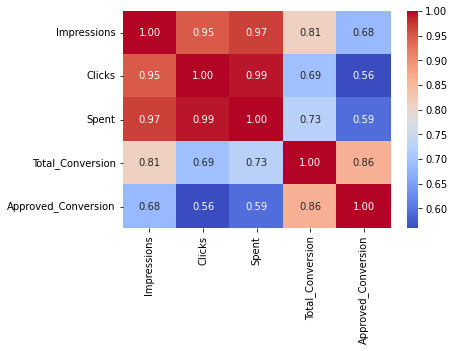

In [ ]:
c=sns.heatmap(df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

Text(0.5, 0.95, 'Numerical features vs. GENDER')

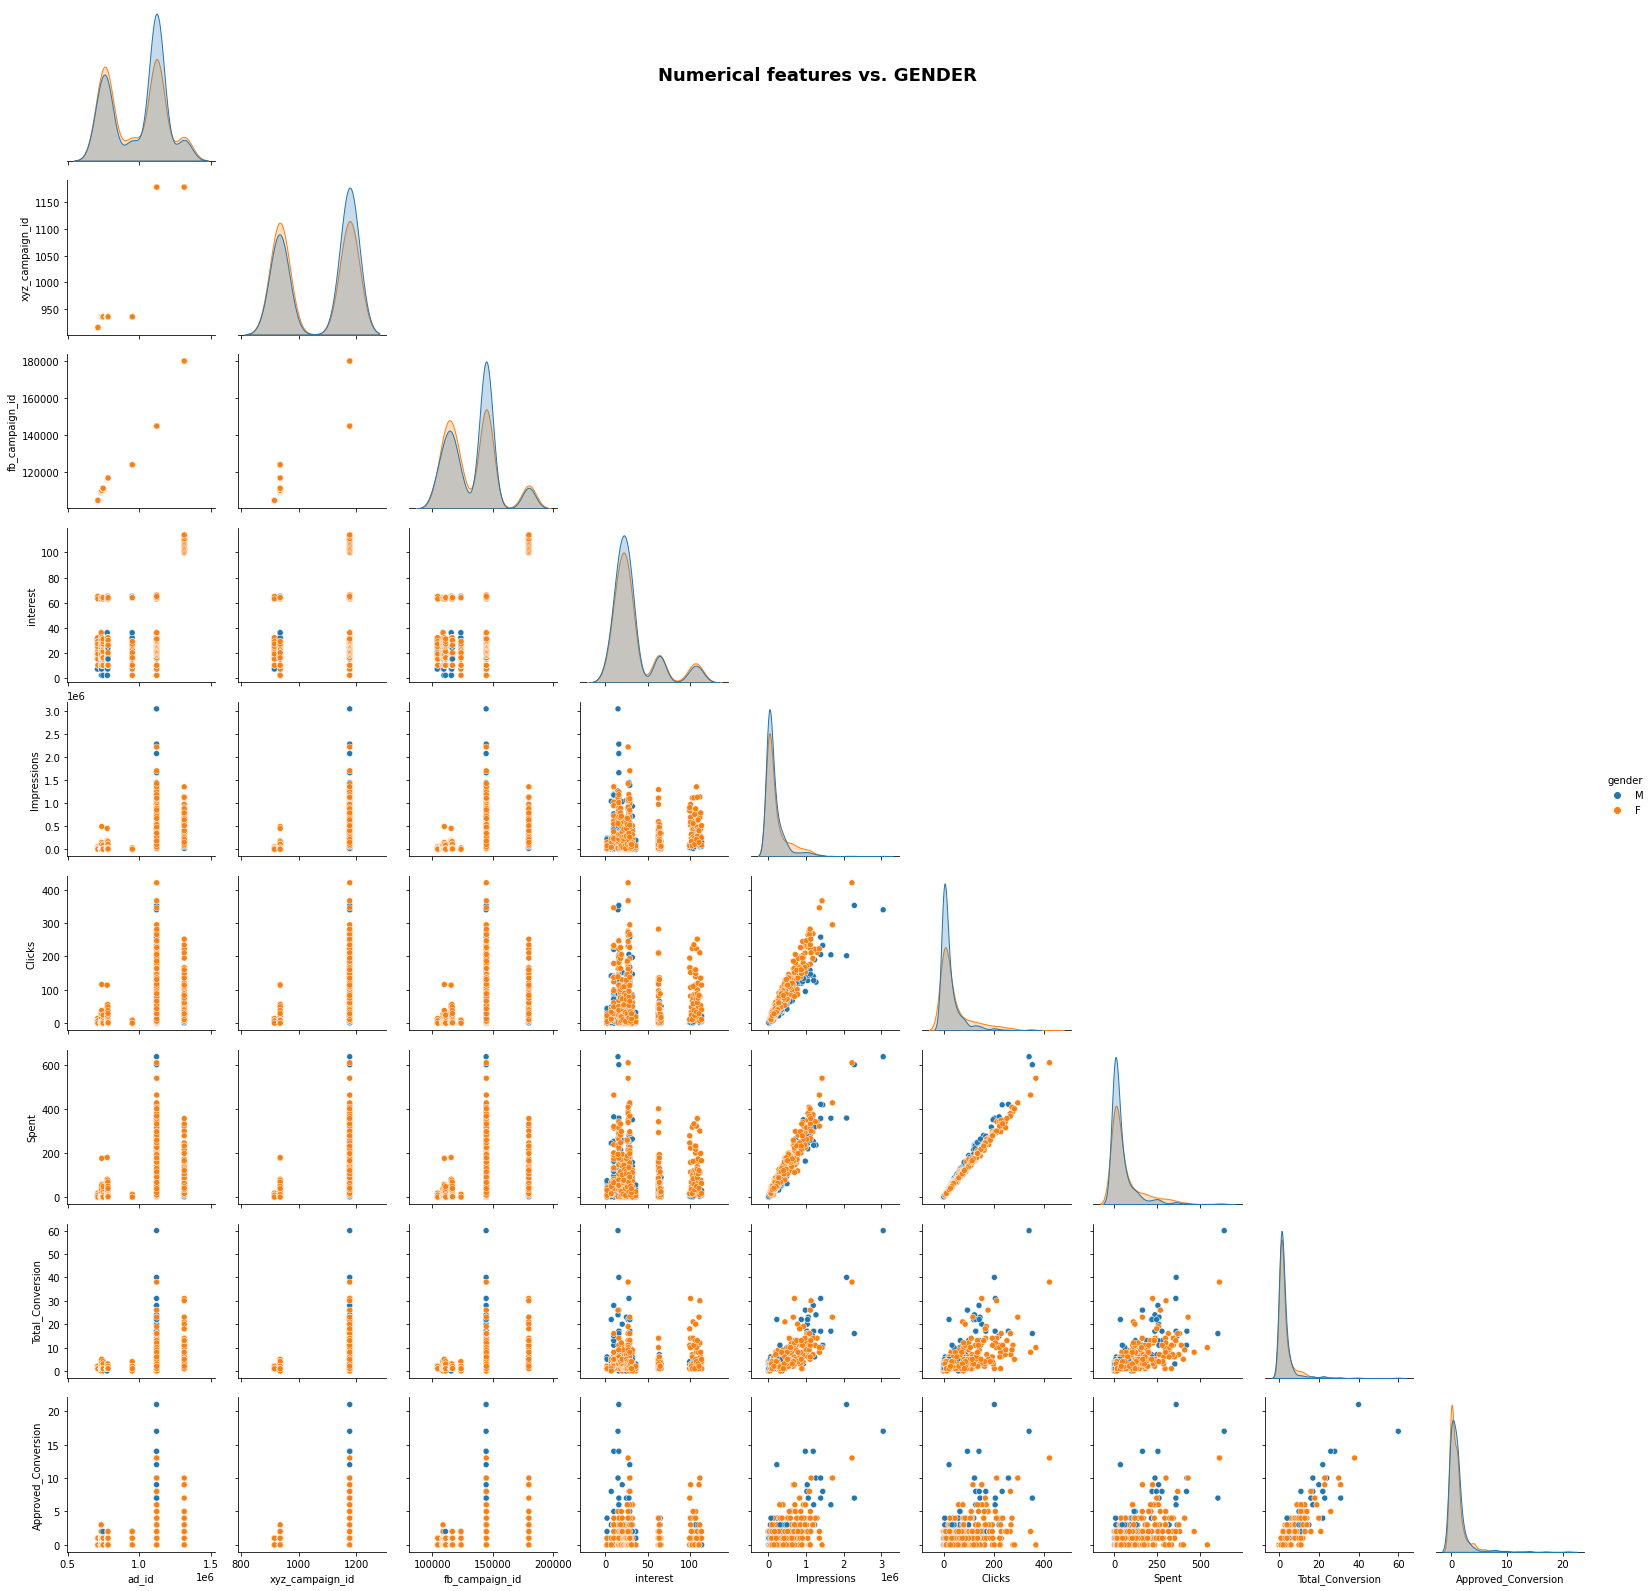

In [ ]:
sns.pairplot(df, corner=True, hue='gender')
plt.suptitle("Numerical features vs. GENDER", x=0.5 ,y=0.95, size=18, weight='bold')

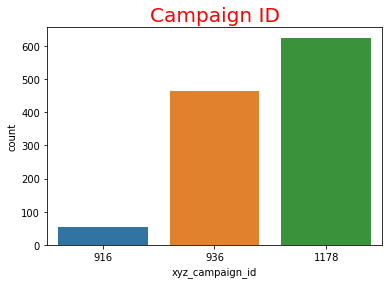

In [ ]:
categories = ['ad_id', 'fb_campaign_id','age', 'gender', 'xyz_campaign_id', 'interest']
df[categories] = df[categories].astype('category')
# count plot on single categorical variable 
sns.countplot(x ='xyz_campaign_id', data = df) 
# Show the plot
# displaying the title
plt.title(label="Campaign ID",
          fontsize=20,
          color="red") 
plt.show()

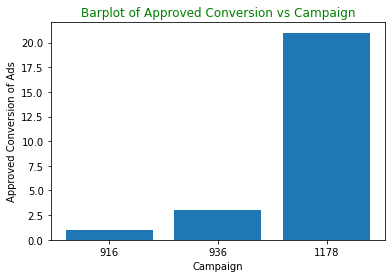

In [ ]:
#Approved_Conversion
# Creating bar plot
plt.bar(df["xyz_campaign_id"].astype(str), df["Approved_Conversion"])
plt.ylabel("Approved Conversion of Ads")
plt.xlabel("Campaign")
plt.title("Barplot of Approved Conversion vs Campaign",color = "green")
plt.show()

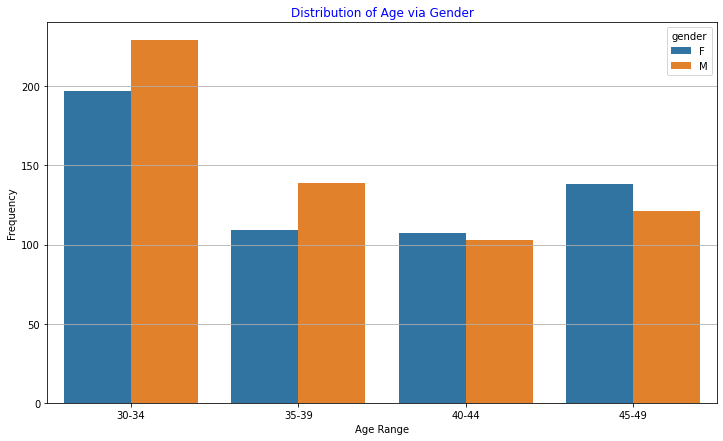

In [ ]:
fig=plt.figure(figsize=(12,7))

sns.countplot(data=df, x='age', hue='gender')
plt.ylabel("Frequency")
plt.xlabel("Age Range")
plt.title('Distribution of Age via Gender', color = "blue")
plt.grid(axis='y')

Text(0.5, 0, 'Campaign via ID')

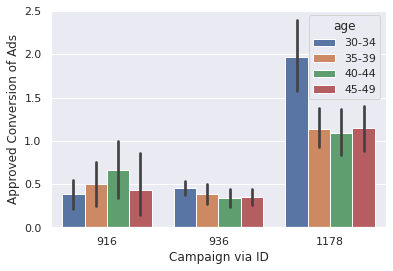

In [ ]:
sns.set(style="darkgrid")
tips = sns.load_dataset("tips")
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["age"], data=tips)
plt.ylabel("Approved Conversion of Ads")
plt.xlabel("Campaign via ID")

Text(0.5, 0, 'Interest Generated')

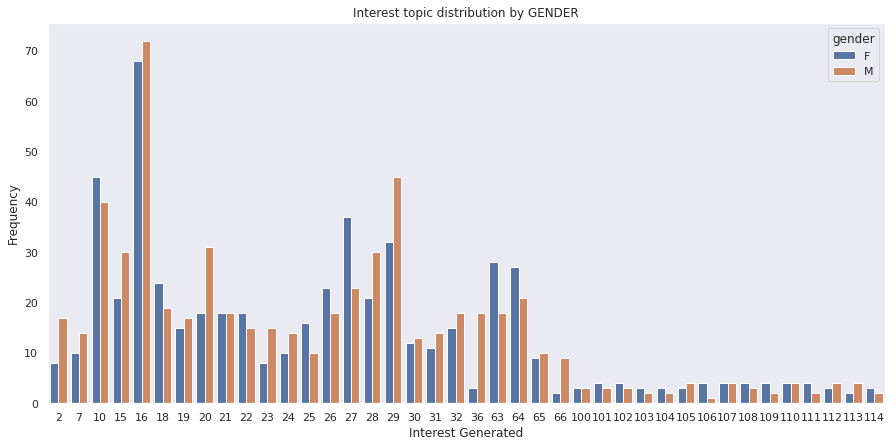

In [ ]:
fig=plt.figure(figsize=(15,7))

sns.countplot(data=df, x='interest', hue='gender')
plt.title('Interest topic distribution by GENDER')
plt.grid(axis='y')
plt.ylabel("Frequency")
plt.xlabel("Interest Generated")

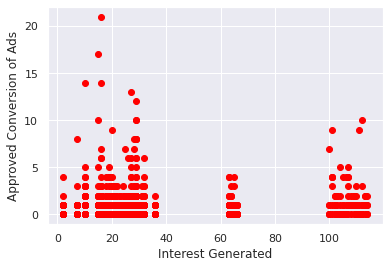

In [ ]:

x=df["interest"]
y=df["Approved_Conversion"]
plt.scatter(x,y,c="red")
plt.xlabel("Interest Generated")
plt.ylabel("Approved Conversion of Ads")
plt.show()

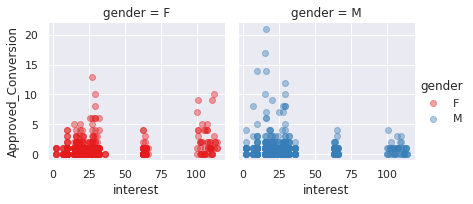

In [ ]:
lyx = sns.FacetGrid(df, col="gender", hue = "gender", palette = 'Set1')
lyx.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
lyx.add_legend()

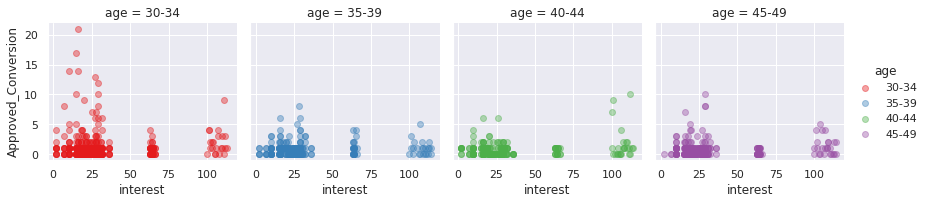

In [ ]:
tk = sns.FacetGrid(df, col="age", hue ="age", palette = 'Set1')
tk.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
tk.add_legend()

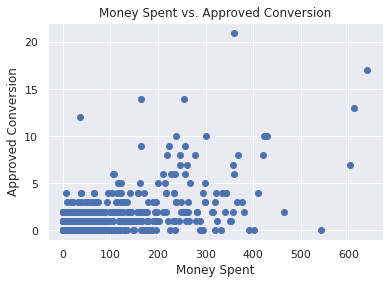

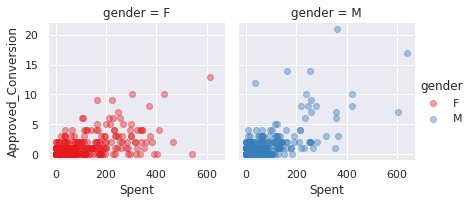

In [ ]:
plt.scatter(df["Spent"], df["Approved_Conversion"])
plt.title("Money Spent vs. Approved Conversion")
plt.xlabel("Money Spent")
plt.ylabel("Approved Conversion")
plt.show()

dkn = sns.FacetGrid(df, col="gender", hue = "gender", palette = 'Set1')
dkn.map(plt.scatter, "Spent", "Approved_Conversion", alpha=.4)
dkn.add_legend()

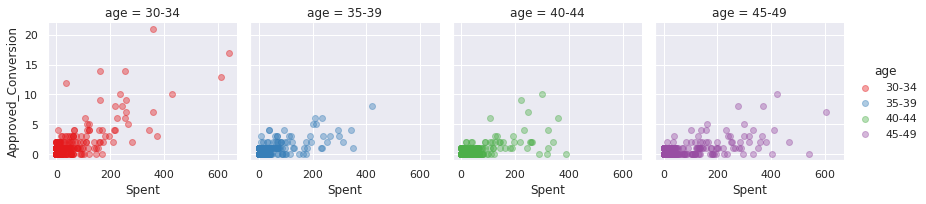

In [ ]:
c = sns.FacetGrid(df, col="age", hue = "age", palette = 'Set1')
c.map(plt.scatter, "Spent", "Approved_Conversion", alpha=.4)
c.add_legend()

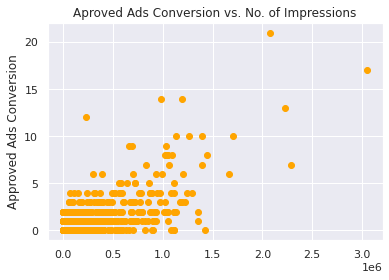

In [ ]:
x=df["Impressions"]
y=df["Approved_Conversion"]
plt.scatter(x,y, c ="orange")
plt.title("Aproved Ads Conversion vs. No. of Impressions")
plt.ylabel("Approved Ads Conversion")
plt.show()

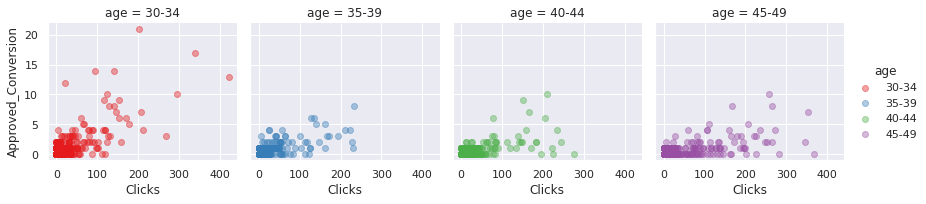

In [ ]:
h = sns.FacetGrid(df, col="age", hue = "age", palette = 'Set1')
h.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
h.add_legend()

In [ ]:
df["xyz_campaign_id"].unique()


array([ 916,  936, 1178])

In [ ]:
df["xyz_campaign_id"].replace({916:"FB Campaign 1",936:"FB Campaign 2",1178:"FB Campaign 3"}, inplace=True)

In [ ]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,FB Campaign 1,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,FB Campaign 1,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,FB Campaign 1,103920,30-34,M,20,693,0,0.00,1,0
3,708815,FB Campaign 1,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,FB Campaign 1,103928,30-34,M,28,4133,1,1.29,1,1


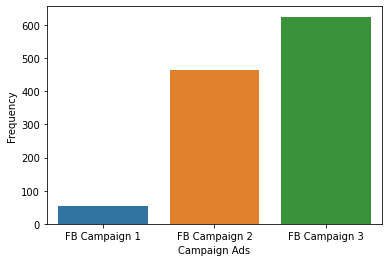

In [ ]:
# Count of plot on single categorical variable 
sns.countplot(x ='xyz_campaign_id', data = df) 
plt.ylabel("Frequency")
plt.xlabel("Campaign Ads")
# Show the plot 
plt.show()

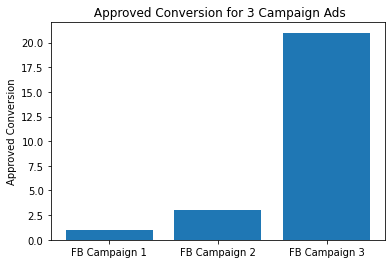

In [ ]:
#Approved_Conversion for all 3 Ads to see which company has more Approved Conversion
# Creating bar plot
plt.bar(df["xyz_campaign_id"], df["Approved_Conversion"])
plt.ylabel("Approved Conversion")
plt.title(" Approved Conversion for 3 Campaign Ads")
plt.show()

In [ ]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,0,1,15,7350,1,1.43,2,1
1,708749,916,103917,0,1,16,17861,2,1.82,2,0
2,708771,916,103920,0,1,20,693,0,0.00,1,0
3,708815,916,103928,0,1,28,4259,1,1.25,1,0
4,708818,916,103928,0,1,28,4133,1,1.29,1,1


In [ ]:
#encoding gender
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(df["gender"])
df["gender"]=encoder.transform(df["gender"])
print(df["gender"])

0       1
1       1
2       1
3       1
4       1
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: gender, Length: 1143, dtype: int64


In [ ]:
#encoding age
encoder.fit(df["age"])
df["age"]=encoder.transform(df["age"])
print(df["age"])

0       0
1       0
2       0
3       0
4       0
       ..
1138    3
1139    3
1140    3
1141    3
1142    3
Name: age, Length: 1143, dtype: int64


In [ ]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,0,1,15,7350,1,1.43,2,1
1,708749,916,103917,0,1,16,17861,2,1.82,2,0
2,708771,916,103920,0,1,20,693,0,0.00,1,0
3,708815,916,103928,0,1,28,4259,1,1.25,1,0
4,708818,916,103928,0,1,28,4133,1,1.29,1,1


1.011985797745594


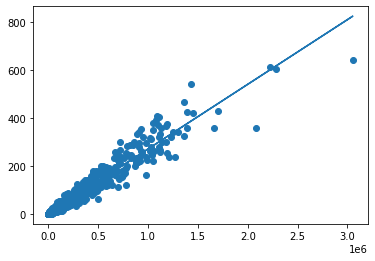

In [ ]:
from scipy import stats
x=df["Impressions"]
y=df["Spent"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

predicted = myfunc(10)

print(predicted)

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [ ]:
print(r)

0.6842485153743508


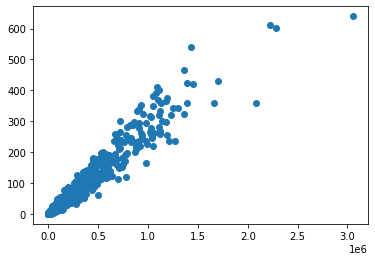

In [ ]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x=df["Impressions"]
y=df["Spent"]

plt.scatter(x, y)
plt.show()

In [ ]:
#Split into Train/Test

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

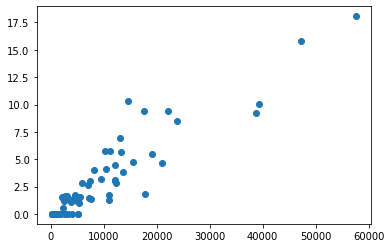

In [ ]:
plt.scatter(train_x, train_y)
plt.show()

In [ ]:
from sklearn.metrics import r2_score

r2model = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

r2 = r2_score(train_y, r2model(train_x))

print(r2)

0.8713809772428649


In [ ]:
print(r2model(1500))

0.21398939276348017


In [ ]:
from sklearn import linear_model

t = df[['Impressions', 'Clicks', 'Spent', 'Total_Conversion']]
k = df['Approved_Conversion']

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(t, k)

#predict the Approved Conversion where the Impressions are 20,000, Clicks are 5, Spent is 5, Total_Conversion is 3:
predictedAC = regr.predict([[51509,8,12.37,1]])
print(predictedAC) #Predicted Approved Conversion based on multiple linear

[0.35125814]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
